# AirB&B Listings Price Analysis - Pre Covid
I am analysing the airbnb data to see what is the right price to charge for rooms in my home. I would start renting around 6 months from now and do it for several years.  I'd like to use the money to help pay for the mortgage, my moms assisted living, and taxes.  I will be analysing prices before covid and during.

### The alternative hypothesis:
We can afford to pay $4000/month for my mom to be in assisted living using AirBnB income from her house. Given a wide range of possible occupancy rates.

Given a wide range of occupancy rates: ____ to 69 percent

Average prices for the facilities I offer are on average more than ____ for the upper suite and 
____ for the room downstairs.


We're also going to pick a significance level of 0.05

### The null Hypothesis:
I will make less than ______ and _______ per night


### How 
1 Basic Data Cleaning <br>
2 Explore data (EDA) <br>
3 Scale and prepare for machine learning<br>
4 Train and test model<br>
5 Make price predictions for my rooms using the model and test data<br>

### What... where the data is from:
https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896 http://insideairbnb.com/get-the-data.html<br>
http://data.insideairbnb.com/united-states/ca/san-francisco/2021-04-07/visualisations/listings.csv<br>
https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=san+francisco<br>
<br>
<br>
<br>
<a href="#Cleaning">Cleaning</a>

# 1)  Basic Data Cleaning:
<a id="Cleaning">

imports
load data
describe data 
Do some basic industry research to understand column descriptions
Examine and fix data types
Examine missing values
Drop mostly empty columns
Drop rows without price
Drop rows where it had the only missing value in a column


#### Import

In [1]:
import datetime
from IPython.display import Image
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from subprocess import call

from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz


%matplotlib inline
#import plotly.graph_objects as go






#### Load data

In [2]:
Abnb_2015_17 = pd.read_csv('../raw_data/airbnb-listings-2017.csv', sep=";")

C:\Users\micro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Abnb_2020_21 = pd.read_csv('../raw_data/AirbnbAugust21/listingsMoreDataAug21.csv')
description_21 = pd.read_csv('../raw_data/AirbnbAugust21/Decriptions_Aug21.csv')

#### Describe data

In [4]:
description_21.style.set_properties(**{'text-align': 'left'})

,Data Dictionary for listings.csv detailed file,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,nan,nan,nan,nan
1,File Name,nan,listings.csv,nan
2,Version,nan,4,nan
3,Date Introduced,nan,"August, 2020",nan
4,Description,nan,nan,nan
5,nan,nan,nan,nan
6,Field,Description,Type,Calculated
7,id,Airbnb's unique identifier for the listing,integer,nan
8,listing_url,nan,text,y
9,scrape_id,"Inside Airbnb ""Scrape"" this was part of",bigint,y


In [5]:
Abnb_2015_17.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,2519334,https://www.airbnb.com/rooms/2519334,20170304065726,2017-03-04,Double in Honor Oak Park With Great Train Links,Double room in a lovely terraced house 2 minut...,"Located on the edge of One Tree Hill, which ha...",Double room in a lovely terraced house 2 minut...,none,"Honor Oak Park is a green leafy suburb, that i...",...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"51.4483552699,-0.0459931392792","Host Has Profile Pic,Host Identity Verified,In..."
1,8384432,https://www.airbnb.com/rooms/8384432,20170502172350,2017-05-03,"Woodland Hills, near golf course",Woodland Hills South of Blvd. home located amo...,Home is a two story building that sits above s...,Woodland Hills South of Blvd. home located amo...,none,NaN,...,10.0,10.0,10.0,NaN,"City of Los Angeles, CA",strict,2.0,0.16,"34.1485944277,-118.596683716","Host Has Profile Pic,Host Identity Verified,Is..."
2,9215842,https://www.airbnb.com/rooms/9215842,20170502172350,2017-05-03,Creative Retreat in Historic Downtown Loft,"A private room in beautiful spacious, light fi...","A private room in a beautiful spacious, light ...","A private room in beautiful spacious, light fi...",none,We are located in Downtown Los Angeles which i...,...,10.0,10.0,10.0,NaN,"City of Los Angeles, CA",moderate,1.0,1.04,"34.0471618625,-118.24671529","Host Has Profile Pic,Host Identity Verified"
3,17850722,https://www.airbnb.com/rooms/17850722,20170502172350,2017-05-03,Hip Hillside Retreat With Breathtaking Views,This hillside gem must be seen to be believed....,NaN,This hillside gem must be seen to be believed....,none,NaN,...,10.0,9.0,10.0,NaN,"City of Los Angeles, CA",strict,2.0,3.00,"34.1168198226,-118.205895751","Host Has Profile Pic,Host Identity Verified,Is..."
4,11727675,https://www.airbnb.com/rooms/11727675,20170502172350,2017-05-03,Spacious Room for Two,The house is very accessible to the freeway an...,NaN,The house is very accessible to the freeway an...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,3.0,1.45,"34.6792631988,-118.170437791","Host Has Profile Pic,Host Identity Verified"


#### Data types

In [6]:
Abnb_2015_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12243 entries, 0 to 12242
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              12243 non-null  object 
 1   Listing Url                     12243 non-null  object 
 2   Scrape ID                       12243 non-null  object 
 3   Last Scraped                    12242 non-null  object 
 4   Name                            12242 non-null  object 
 5   Summary                         11837 non-null  object 
 6   Space                           9085 non-null   object 
 7   Description                     12240 non-null  object 
 8   Experiences Offered             12243 non-null  object 
 9   Neighborhood Overview           7736 non-null   object 
 10  Notes                           6066 non-null   object 
 11  Transit                         8075 non-null   object 
 12  Access                          

#### Fixing date Types:
These dates were all objects origionally.

In [7]:
Abnb_2015_17['First Review'] = pd.to_datetime(Abnb_2015_17['First Review'])
Abnb_2015_17['Last Scraped']= pd.to_datetime(Abnb_2015_17['Last Scraped'])
Abnb_2015_17['Host Since']= pd.to_datetime(Abnb_2015_17['Host Since'])
Abnb_2015_17['Calendar last Scraped']= pd.to_datetime(Abnb_2015_17['Calendar last Scraped'])
Abnb_2015_17['Last Review']= pd.to_datetime(Abnb_2015_17['Last Review'])

In [8]:
Abnb_2015_17.shape

(12243, 89)

#### Missing values

In [9]:
missing = pd.concat([Abnb_2015_17.isnull().sum(), 100 * Abnb_2015_17.isnull().mean()], axis=1)
missing.columns=['count', '% missing']
missing_sorted = missing.sort_values(by='count', ascending=False)
print('missing_sorted:',type(missing_sorted))
missing_sorted.style.set_properties(**{'text-align': 'left'})

missing_sorted: <class 'pandas.core.frame.DataFrame'>


,count,% missing
Has Availability,12036,98.309238
Square Feet,11950,97.606796
Neighbourhood Group Cleansed,11564,94.453974
Host Acceptance Rate,11053,90.280160
License,11028,90.075962
Weekly Price,10276,83.933676
Monthly Price,9658,78.885894
Security Deposit,7004,57.208201
Notes,6177,50.453320
Interaction,5598,45.724087


#### Dropping mostly Empty Columns
These columns were missing 90% of their values.  One column was missing only 70%

Has Availability - 98% missing.  I'm dropping this column because it is obviously inaccurate and empty

Square feet - 98% missing. I'm dropping this because it has so little data that it is not relevent.

Host Acceptance Rate - 90% missing. This is a suspicious column because it is missing so much data. A high Acceptance Rate is almost required to have a business at all. If you do not accept you get a low rate rather than no entry.  Later data sets had much more info in here.  I'm guessing this is the year they started this column.

Weekly Price - 83% missing. I'm dropping this because few hosts offer weekly rates during this time frame.

Monthly Price - 78% missing. I'm dropping this because few hosts offer weekly rates during this time frame.


In [10]:
Abnb_2015_17 = Abnb_2015_17.drop(['Has Availability',
                                 'Square Feet',
                                 'Neighbourhood Group Cleansed', 
                                 'Host Acceptance Rate',  
                                 'Weekly Price', 
                                 'Monthly Price'], axis=1)

#### Dropping Empty Rows:
The price was missing or there was just one missing value in that column

In [11]:
Abnb_2015_17 = Abnb_2015_17.dropna(axis=0, subset=['Price'])
Abnb_2015_17 = Abnb_2015_17.dropna(axis=0, subset=['Availability 365'])
Abnb_2015_17 = Abnb_2015_17.dropna(axis=0, subset=['Host Since'])
Abnb_2015_17.shape

(11972, 83)

#### Making this value Boolean
You have a licence or you don't.

In [12]:
Abnb_2015_17['License'] = Abnb_2015_17['License'].isnull() == False
Abnb_2015_17['License'].value_counts()

False    10765
True      1207
Name: License, dtype: int64

##### Filling in with 0.0 and 1
The most likely missing value is filled in here. This is based on an understanding of AirBnB rentals and input fields.

In [13]:
Abnb_2015_17['Cleaning Fee']= Abnb_2015_17['Cleaning Fee'].fillna(0.0)
Abnb_2015_17['Security Deposit']= Abnb_2015_17['Security Deposit'].fillna(0.0)
Abnb_2015_17['Bathrooms']= Abnb_2015_17['Bathrooms'].fillna(0.0)
Abnb_2015_17['Beds']= Abnb_2015_17['Beds'].fillna(0.0)
Abnb_2015_17['Bedrooms']= Abnb_2015_17['Bedrooms'].fillna(0.0)
Abnb_2015_17['Guests Included']= Abnb_2015_17['Guests Included'].fillna(0.0)
Abnb_2015_17['Host Listings Count']= Abnb_2015_17['Host Listings Count'].fillna(1)
Abnb_2015_17['Host Total Listings Count']= Abnb_2015_17['Host Total Listings Count'].fillna(1)

##### Filling in with ""
This is text and categorical data.

In [14]:
Abnb_2015_17['Host About']= Abnb_2015_17['Host About'].fillna("")
Abnb_2015_17['Neighborhood Overview']= Abnb_2015_17['Neighborhood Overview'].fillna("")
Abnb_2015_17['Notes']= Abnb_2015_17['Notes'].fillna("")
Abnb_2015_17['Transit']= Abnb_2015_17['Transit'].fillna("")
Abnb_2015_17['Access']= Abnb_2015_17['Access'].fillna("")
Abnb_2015_17['House Rules']= Abnb_2015_17['House Rules'].fillna("")
Abnb_2015_17['Interaction']= Abnb_2015_17['Interaction'].fillna("")
Abnb_2015_17['Host Response Time']= Abnb_2015_17['Host Response Time'].fillna("")
Abnb_2015_17['Space']= Abnb_2015_17['Space'].fillna("")
Abnb_2015_17['XL Picture Url']= Abnb_2015_17['XL Picture Url'].fillna("")
Abnb_2015_17['Medium Url']= Abnb_2015_17['Medium Url'].fillna("")
Abnb_2015_17['Thumbnail Url']= Abnb_2015_17['Thumbnail Url'].fillna("")
Abnb_2015_17['Jurisdiction Names']= Abnb_2015_17['Jurisdiction Names'].fillna("")
Abnb_2015_17['Summary']= Abnb_2015_17['Summary'].fillna("")
Abnb_2015_17['Neighbourhood']= Abnb_2015_17['Neighbourhood'].fillna("")
Abnb_2015_17['Host Neighbourhood']= Abnb_2015_17['Host Neighbourhood'].fillna("")
Abnb_2015_17['Zipcode']= Abnb_2015_17['Zipcode'].fillna("")
Abnb_2015_17['State']= Abnb_2015_17['State'].fillna("")
Abnb_2015_17['Amenities']= Abnb_2015_17['Amenities'].fillna("")
Abnb_2015_17['Market']= Abnb_2015_17['Market'].fillna("")
Abnb_2015_17['Host Location']= Abnb_2015_17['Host Location'].fillna("")
Abnb_2015_17['Picture Url']= Abnb_2015_17['Picture Url'].fillna("")
Abnb_2015_17['Host Picture Url']= Abnb_2015_17['Host Picture Url'].fillna("")
Abnb_2015_17['Host Name']= Abnb_2015_17['Host Name'].fillna("")
Abnb_2015_17['Host Thumbnail Url']= Abnb_2015_17['Host Thumbnail Url'].fillna("")
Abnb_2015_17['Host Verifications']= Abnb_2015_17['Host Verifications'].fillna("")
Abnb_2015_17['Description']= Abnb_2015_17['Description'].fillna("")
Abnb_2015_17['Features']= Abnb_2015_17['Features'].fillna("")
Abnb_2015_17['Minimum Nights']= Abnb_2015_17['Minimum Nights'].fillna("")
Abnb_2015_17['Property Type']= Abnb_2015_17['Property Type'].fillna("")
Abnb_2015_17['Name']= Abnb_2015_17['Name'].fillna("")
Abnb_2015_17['Calendar Updated']= Abnb_2015_17['Calendar Updated'].fillna("")

#### The last difficult missing values are host response and reviews.
The Customers do not always give reviews.  And for some reason 2000 hosts do not have a host response time.

I have decided that the over 2000 hosts that do not seem to respond should be ignored.  They may not have sold a listing.  Maybe they were not active in this timeframe.  In both of those cases their data is not very relevant.  According to AirBnB Host response time is very important.  If your time is not fast, you are probably not in the game.

Records with no reviews: Here we run into the possibility that the listing is not yet reviewed, or rented or all their customers are lazy.  In all cases they may not represent the market as a longer term investment.  I will drop them too.

In [15]:
Abnb_2015_17.shape

(11972, 83)

In [16]:
Abnb_2015_17 = Abnb_2015_17.dropna()
Abnb_2015_17.shape

(7745, 83)

#### Final missing value check

In [17]:
missing = pd.concat([Abnb_2015_17.isnull().sum(), 100 * Abnb_2015_17.isnull().mean()], axis=1)
missing.columns=['count', '% missing']
missing_sorted = missing.sort_values(by='count', ascending=False)
print('missing_sorted:',type(missing_sorted))
missing_sorted.style.set_properties(**{'text-align': 'left'})

missing_sorted: <class 'pandas.core.frame.DataFrame'>


,count,% missing
ID,0,0.000000
Availability 60,0,0.000000
Calendar Updated,0,0.000000
Maximum Nights,0,0.000000
Minimum Nights,0,0.000000
Extra People,0,0.000000
Guests Included,0,0.000000
Cleaning Fee,0,0.000000
Security Deposit,0,0.000000
Price,0,0.000000


<br>
<br>
<br>

# 2) EDA
Histogrames,<br>
Pair plots, <br>
Data Distributions and<br>
Heatmaps<br>
            ......................Oh My!

#### Statistics import

In [18]:
from scipy import stats

#### Price

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

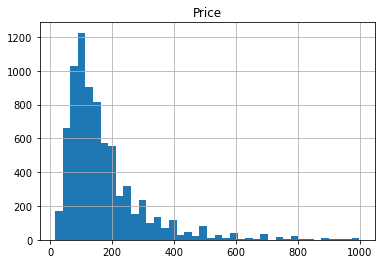

In [77]:
#plt.hist(Abnb_2015_17, bins = 20)

#plt.xlabel('Price')

#plt.ylabel('Number of listings')
Abnb_2015_17.hist(column='Price', bins = 40)

#### Distribution

In [20]:
# Create a subset of the column 'Price' by the Types of rooms.
EntirePlace = Abnb_2015_17[Abnb_2015_17['Room Type'] == 'Entire home/apt']['Price']
PrivateRoom = Abnb_2015_17[Abnb_2015_17['Room Type'] == 'Private room']['Price']
SharedRoom = Abnb_2015_17[Abnb_2015_17['Room Type'] == 'Shared room']['Price']

In [21]:
# Are the listing prices are normally distributed?
# The lower the p-value in the result of this test, the more likely the data are to be non-normal. 
entire_normal = stats.normaltest(EntirePlace)
private_normal = stats.normaltest(PrivateRoom)
shared_normal = stats.normaltest(SharedRoom)
print('EntirePlace:', entire_normal)
print('Private:', private_normal)
print('Shared:', shared_normal)

EntirePlace: NormaltestResult(statistic=2020.4352293399165, pvalue=0.0)
Private: NormaltestResult(statistic=2316.7318020756857, pvalue=0.0)
Shared: NormaltestResult(statistic=365.6508972590782, pvalue=3.9803064347352215e-80)


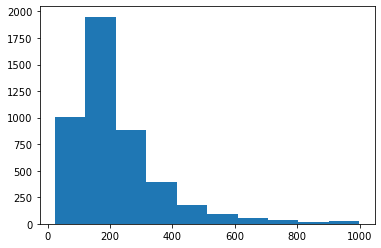

In [22]:
histoEntire = plt.hist(EntirePlace)

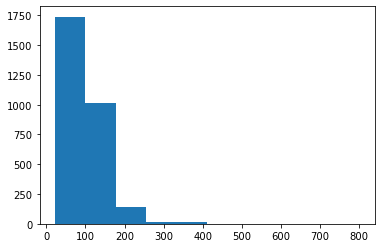

In [23]:
histoPrivate = plt.hist(PrivateRoom)

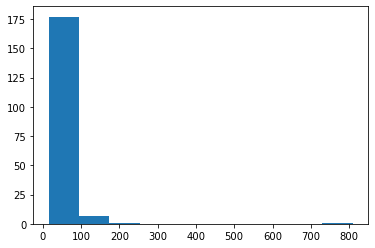

In [24]:
histoShared = plt.hist(SharedRoom)

#### Found a major outlier here that I could have just deleted. 
I found it's cause in general and fixed the calculation.

In [25]:
Abnb_2015_17['BedsMod'] = Abnb_2015_17['Beds'].replace(0,1)
Abnb_2015_17["Price_per_Bed"] = Abnb_2015_17["Price"]/Abnb_2015_17["BedsMod"]
#Abnb_2015_17.hist(column='Price_per_Bed')
SharedRoomPB = Abnb_2015_17[Abnb_2015_17['Room Type'] == 'Shared room']['Price_per_Bed']

#### Price per bed - shared rooms

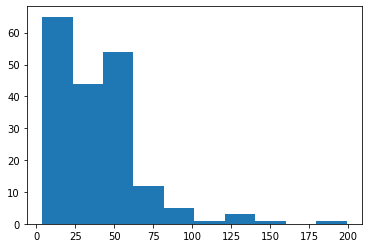

In [26]:
histoSharedPerBed = plt.hist(SharedRoomPB)

#### Price by type of room or property

In [27]:
Abnb_2015_17.groupby(['Room Type'])['Price_per_Bed'].describe()

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Entire home/apt,4636.0,121.289841,77.613106,4.928571,70.00,100.0,150.0,982.0
Private room,2923.0,91.543519,47.344813,7.500000,60.00,85.0,110.0,759.0
Shared room,186.0,37.574142,29.706822,3.750000,12.25,35.0,49.0,199.0


<AxesSubplot:title={'center':'Price'}, xlabel='Room Type'>

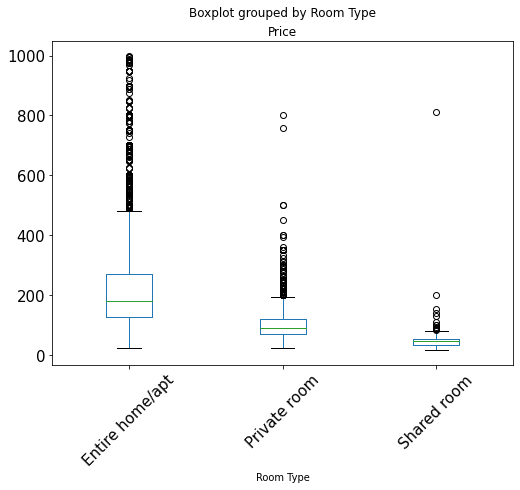

In [28]:
Abnb_2015_17.boxplot(by='Room Type', column ='Price', grid=False, rot=45, fontsize=15, figsize = (8,6))

<AxesSubplot:title={'center':'Price_per_Bed'}, xlabel='Room Type'>

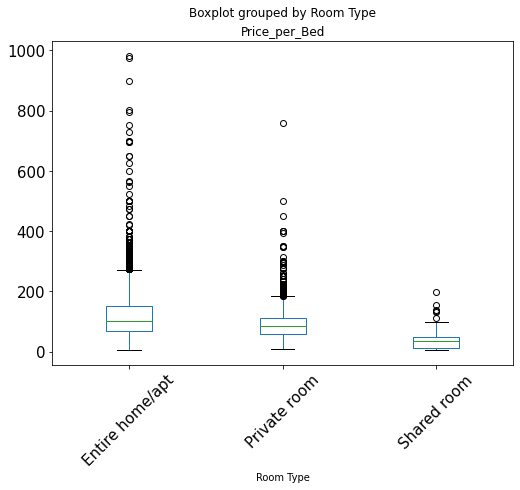

In [29]:
Abnb_2015_17.boxplot(by='Room Type', column ='Price_per_Bed', grid=False, rot=45, fontsize=15, figsize = (8,6))

<AxesSubplot:title={'center':'Price'}, xlabel='Accommodates'>

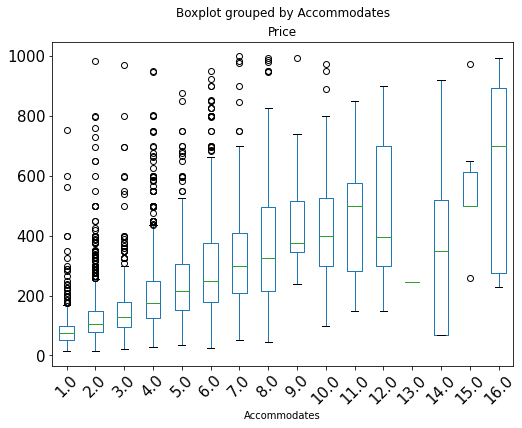

In [30]:
Abnb_2015_17.boxplot(by='Accommodates', column ='Price', grid=False, rot=45, fontsize=15, figsize = (8,6))

<AxesSubplot:title={'center':'Price'}, xlabel='Review Scores Value'>

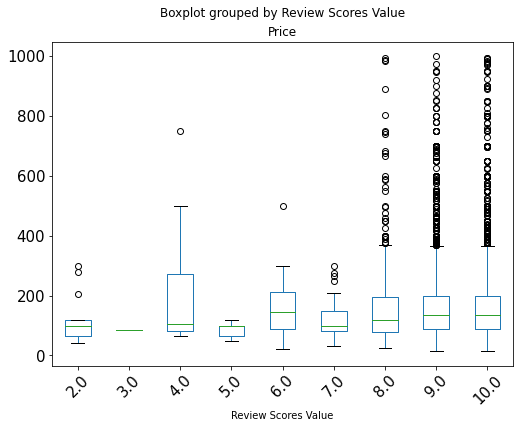

In [31]:
Abnb_2015_17.boxplot(by='Review Scores Value', column ='Price', grid=False, rot=45, fontsize=15, figsize = (8,6))

<AxesSubplot:title={'center':'Price'}, xlabel='Review Scores Cleanliness'>

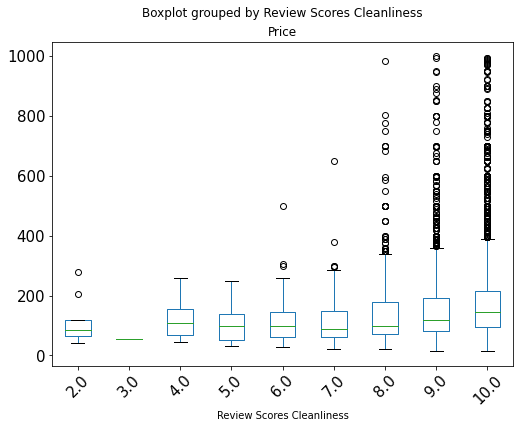

In [71]:
reviews = ['Review Scores Accuracy','Review Scores Cleanliness',
           'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value' ]
reviews_toBox = Abnb_2015_17[reviews]
#reviews_toBox.boxplot(grid=False, rot=45, fontsize=15, figsize=(19,8))
#'Number of Reviews', ' Review Scores Rating',
#reviews_toBox.boxplot(by='Review Scores Cleanliness', column ='Price', grid=False, rot=45, fontsize=15, figsize = (8,6))
Abnb_2015_17.boxplot(by='Review Scores Cleanliness', column ='Price', grid=False, rot=45, fontsize=15, figsize = (8,6))

In [33]:
property_type_price_means = Abnb_2015_17.groupby('Room Type')['Price'].mean()
property_type_price_means.sort_values()

Room Type
Shared room         51.930108
Private room        99.829285
Entire home/apt    222.241803
Name: Price, dtype: float64

In [34]:
property_type_price_means = Abnb_2015_17.groupby('Room Type')['Price_per_Bed'].mean()
property_type_price_means.sort_values()

Room Type
Shared room         37.574142
Private room        91.543519
Entire home/apt    121.289841
Name: Price_per_Bed, dtype: float64

##### Outlier explorations

In [35]:
#SharedroomOutliers = Abnb_2015_17.loc[Abnb_2015_17["Price"] >=100.0]
#SharedRoomout = SharedroomOutliers[SharedroomOutliers['Room Type'] == 'Shared room']['Price']
#print(SharedRoomout)
#p810 = Abnb_2015_17.loc[Abnb_2015_17["Price"] == 810.0]
#print(p810['Beds'])
#Abnb_2015_17['Beds'].unique()
#Abnb_2015_17["PPB"] = Abnb_2015_17["Price"]/Abnb_2015_17["Beds"]

#### By Property type

<AxesSubplot:title={'center':'Price'}, xlabel='Property Type'>

<Figure size 1440x360 with 0 Axes>

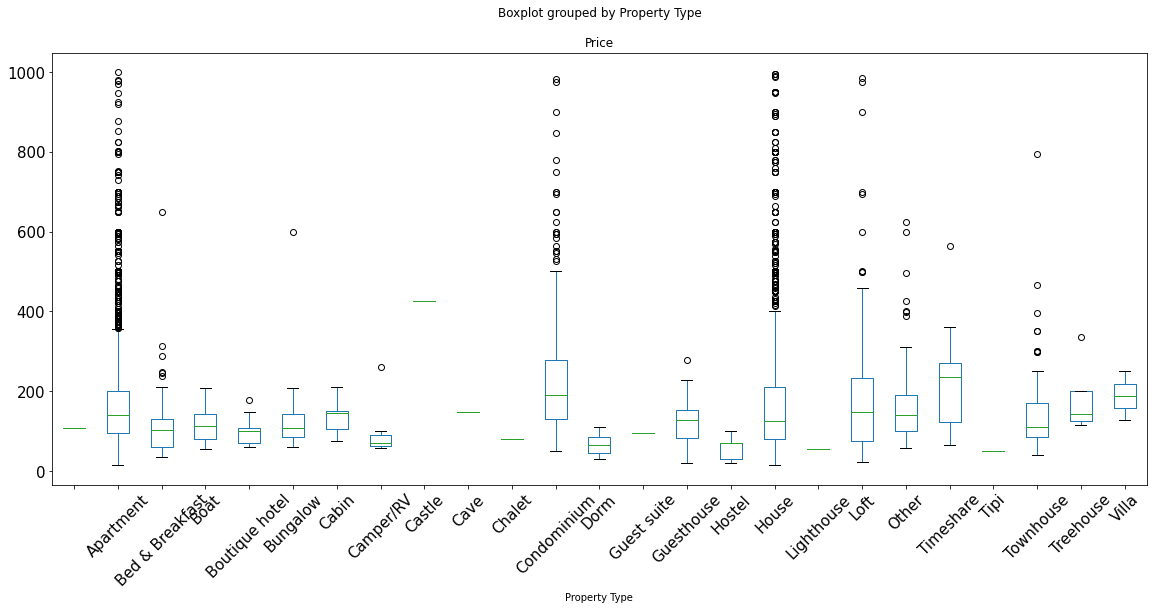

In [36]:
plt.figure(figsize=(20,5))

Abnb_2015_17.boxplot(by='Property Type', column ='Price', grid=False, rot=45, fontsize=15, figsize=(19,8))

In [37]:
property_type_price_means = Abnb_2015_17.groupby('Property Type')['Price'].mean()
property_type_price_means.sort_values()

Property Type
Tipi                50.000000
Lighthouse          55.000000
Hostel              57.666667
Dorm                63.372549
Chalet              80.000000
Guest suite         95.000000
Boutique hotel      95.159091
Camper/RV           99.000000
                   109.000000
Bed & Breakfast    113.619565
Boat               120.200000
Guesthouse         123.406250
Bungalow           132.782609
Cabin              134.117647
Cave               147.000000
Townhouse          159.018519
Apartment          167.420534
Other              168.279570
House              177.173930
Treehouse          183.500000
Loft               185.664557
Villa              188.500000
Timeshare          219.652174
Condominium        231.248718
Castle             425.000000
Name: Price, dtype: float64

# Exploring the numerical data 

#### separating out the numerical and date values

In [38]:
numCols =['Host Response Time', 'Host Response Rate', 'Security Deposit', 'Host Listings Count', 'Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value','Calculated host listings count', 'Reviews per Month', 'Price_per_Bed' ,'Price']
dateCols = ['Host Since', 'First Review', 'Last Review','License']
Abnb_2015_17['Host Response Time'].unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

#### Making numbers for things that should be numbered

In [39]:
Abnb_2015_17['Host Response Time']=Abnb_2015_17['Host Response Time'].str.replace('within an hour','1')
Abnb_2015_17['Host Response Time']=Abnb_2015_17['Host Response Time'].str.replace('within a few hours','3')
Abnb_2015_17['Host Response Time']=Abnb_2015_17['Host Response Time'].str.replace('within a day','24')
Abnb_2015_17['Host Response Time']=Abnb_2015_17['Host Response Time'].str.replace('a few days or more','72')
Abnb_2015_17['Host Response Time'] = pd.to_numeric(Abnb_2015_17['Host Response Time'])


#### First histogram look

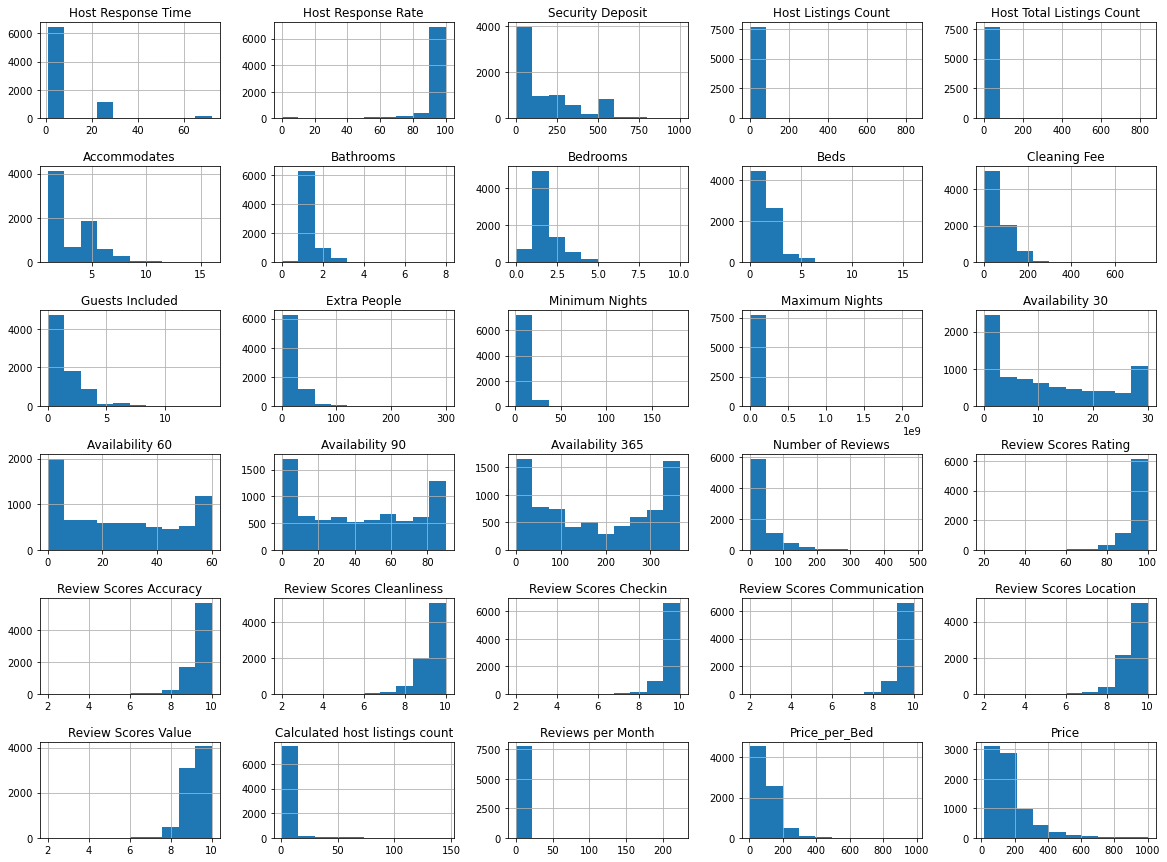

In [40]:
#colList = list(Abnb_2015_17.columns)
NumericDF = Abnb_2015_17[numCols]

NumericDF.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

#### Removing singular outliers

In [41]:
Abnb_2015_17 = Abnb_2015_17.loc[Abnb_2015_17["Reviews per Month"] != 223.0]
Abnb_2015_17 = Abnb_2015_17.loc[Abnb_2015_17["Calculated host listings count"] != 145.0]
Abnb_2015_17 = Abnb_2015_17.loc[Abnb_2015_17["Minimum Nights"] < 200.0]
Abnb_2015_17 = Abnb_2015_17.loc[Abnb_2015_17["Maximum Nights"] < 4000.0]
Abnb_2015_17["Minimum Nights"].max()

180.0

#### Explorations

In [42]:
#Abnb_2015_17 = Abnb_2015_17.loc[Abnb_2015_17["Host Total Listings Count"] <= 200.0]
#Abnb_2015_17 = Abnb_2015_17.loc[Abnb_2015_17["Maximum Nights"] <=4000.0]
#howmanybig = Abnb_2015_17.loc[Abnb_2015_17["Maximum Nights"] >=1126.0]
#howmanybig.head()
#howmanybig = Abnb_2015_17.loc[Abnb_2015_17["Host Total Listings Count"] >=150.0]
#howmanybig['Host Total Listings Count'].sort_values()
#howmanybig = Abnb_2015_17.loc[Abnb_2015_17["Latitude"] <=0]
#tooManyMask = Abnb_2015_17['Reviews per Month']>200
#filtered_df = Abnb_2015_17[tooManyMask]
#filtered_df.head()
#filtered_df['Price']
#howmanybig['Maximum Nights'].sort_values()
#test1 = Abnb_2015_17[Abnb_2015_17['Longitude'].between(-122.5, -122.357)]
#test2 = Abnb_2015_17[Abnb_2015_17['Latitude'].between(37.708339, 37.833659)]
#print(Abnb_2015_17.shape,test1['Longitude'].shape,test2['Latitude'].shape)
#Abnb_2015_17['Host Total Listings Count'].hist(figsize=(20, 15), bins = 100)
#plt.subplots_adjust(hspace=0.5)
#colList = list(Abnb_2015_17.columns)

#### Second histogram look

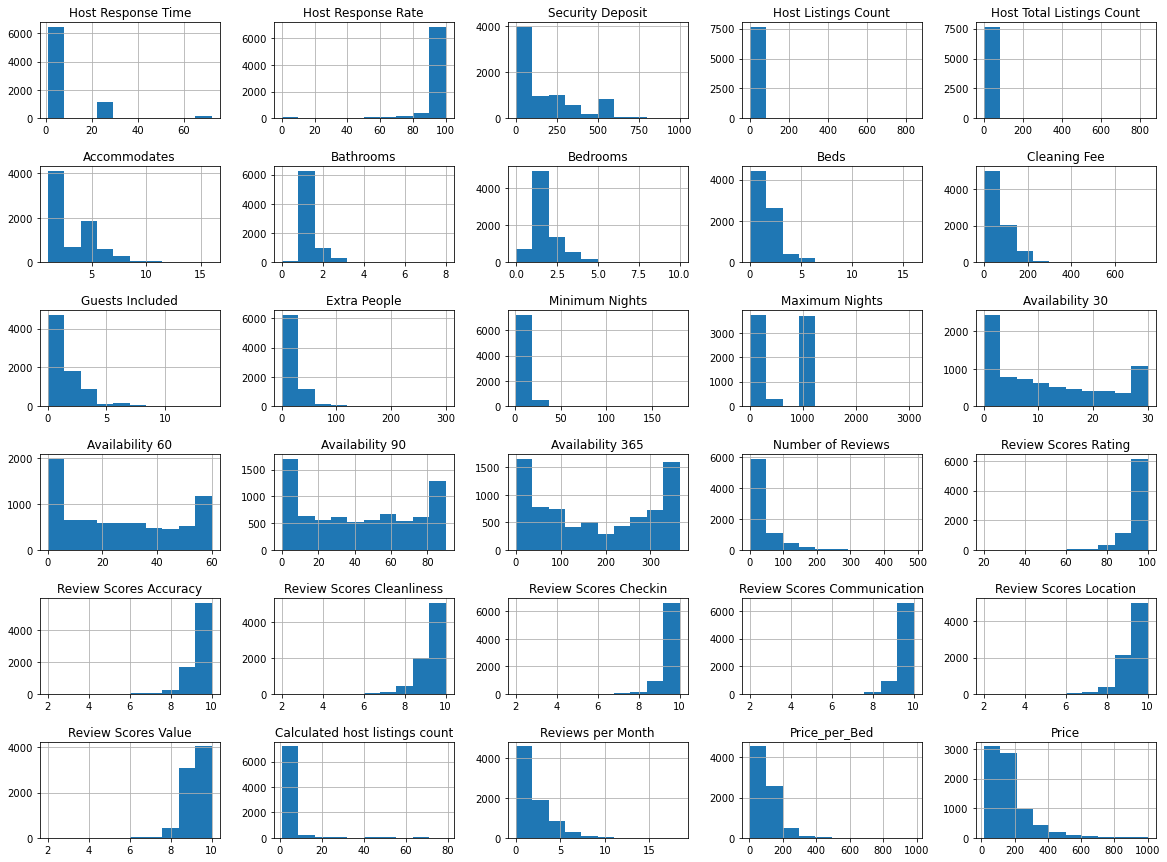

In [43]:
NumericDF = Abnb_2015_17[numCols]
NumericDF.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:>

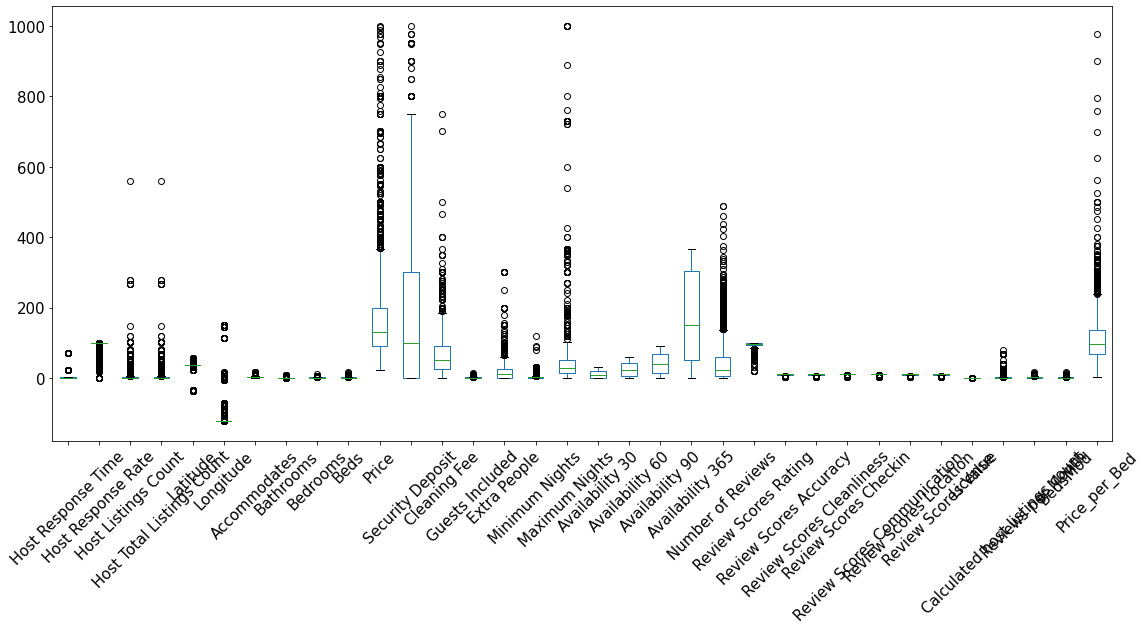

In [44]:
to_box = Abnb_2015_17.drop(['Host ID'], axis=1)

to_box = to_box.loc[Abnb_2015_17["Maximum Nights"] < 1000.0]
to_box.boxplot(grid=False, rot=45, fontsize=15, figsize=(19,8))


In [45]:
Abnb_2015_17.describe().T

,count,mean,std,min,25%,50%,75%,max
Host ID,7732.0,1.967518e+07,2.597567e+07,46.000000,2.669666e+06,8.290488e+06,2.533457e+07,1.218900e+08
Host Response Time,7732.0,6.267977e+00,1.202251e+01,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,7.200000e+01
Host Response Rate,7732.0,9.542525e+01,1.350437e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,7732.0,6.539058e+00,2.545382e+01,0.000000,1.000000e+00,1.000000e+00,3.000000e+00,8.370000e+02
Host Total Listings Count,7732.0,6.539058e+00,2.545382e+01,0.000000,1.000000e+00,1.000000e+00,3.000000e+00,8.370000e+02
Latitude,7732.0,3.765839e+01,7.193346e+00,-37.909319,3.774913e+01,3.777291e+01,3.779804e+01,5.597584e+01
Longitude,7732.0,-1.089664e+02,3.987157e+01,-123.165846,-1.224354e+02,-1.224140e+02,-1.222465e+02,1.535356e+02
Accommodates,7732.0,3.257501e+00,2.028012e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,7732.0,1.247478e+00,5.918649e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,7732.0,1.310657e+00,8.638983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01


#### Separating out numerical columns for pair plots of reasonable size

In [46]:
numCols =['Host Response Time', 'Host Response Rate', 'Security Deposit', 'Host Listings Count', 'Host Total Listings Count',
          'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Guests Included', 'Extra People', 
          'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 
          'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
          'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
          'Calculated host listings count', 'Reviews per Month', 'Price_per_Bed', 'Price']

numCols1 = ['Security Deposit', 'Cleaning Fee', 'Accommodates', 'Guests Included', 'Extra People', 'Bathrooms', 
            'Bedrooms', 'Beds','Price_per_Bed', 'Price']
numCols2 = ['Host Response Time', 'Host Response Rate', 'Host Listings Count', 
            'Host Total Listings Count', 'Calculated host listings count','Price_per_Bed', 'Price']
numCols3 = ['Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
            'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
            'Reviews per Month', 'Price_per_Bed', 'Price']
numCols4 = ['Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
            'Price_per_Bed', 'Price']

dateCols = ['Host Since', 'First Review', 'Last Review','License']

NumericDF = Abnb_2015_17[numCols]
NumericDF1 = Abnb_2015_17[numCols1]
NumericDF2 = Abnb_2015_17[numCols2]
NumericDF3 = Abnb_2015_17[numCols3]
NumericDF4 = Abnb_2015_17[numCols4]

#### First pair plot look

In [47]:
#sns.pairplot(NumericDF1)

In [48]:
#sns.pairplot(NumericDF2)

In [49]:
#sns.pairplot(NumericDF3)

In [50]:
#sns.pairplot(NumericDF4)

#### First Heatmap look

<AxesSubplot:>

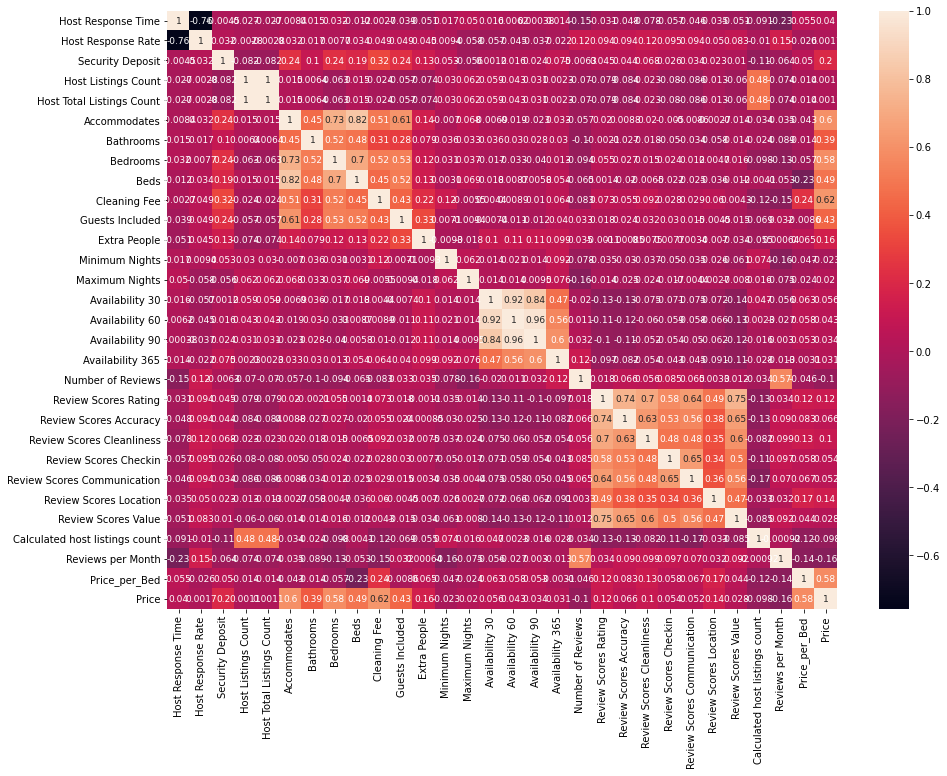

In [51]:
plt.figure(figsize=(15,11))
sns.heatmap(NumericDF.corr(), annot=True, annot_kws={"fontsize":9})

In [52]:
#plt.figure(figsize=(15,11))
#sns.heatmap(NumericDF1.corr(), annot=True, annot_kws={"fontsize":9})

In [53]:
#plt.figure(figsize=(15,11))
#sns.heatmap(NumericDF2.corr(), annot=True, annot_kws={"fontsize":9})

In [54]:
#plt.figure(figsize=(15,11))
#sns.heatmap(NumericDF3.corr(), annot=True, annot_kws={"fontsize":9})

In [55]:
#plt.figure(figsize=(15,11))
#sns.heatmap(NumericDF4.corr(), annot=True, annot_kws={"fontsize":9})

model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)


#### Dummy Features

In [56]:
#Looking to find the right columns:
Abnb_2015_17.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7732 entries, 1 to 12242
Data columns (total 85 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              7732 non-null   object        
 1   Listing Url                     7732 non-null   object        
 2   Scrape ID                       7732 non-null   object        
 3   Last Scraped                    7732 non-null   datetime64[ns]
 4   Name                            7732 non-null   object        
 5   Summary                         7732 non-null   object        
 6   Space                           7732 non-null   object        
 7   Description                     7732 non-null   object        
 8   Experiences Offered             7732 non-null   object        
 9   Neighborhood Overview           7732 non-null   object        
 10  Notes                           7732 non-null   object        
 11  Tra

In [57]:
# A test to see if it is dummyable
Abnb_2015_17['Experiences Offered'].unique()

array(['none', 'business', 'romantic', 'family', 'social'], dtype=object)

In [58]:
#MaybeDummyable = ['Zipcode','Host Verifications', 'Neighbourhood', 'Smart Location','Amenities',]
ToForest = Abnb_2015_17.drop(['ID', 'Listing Url', 'Scrape ID', 'Name', 'Summary', 'Space', 'Description',  
 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 
 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Location', 'Host About', 
 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Street', 
 'Neighbourhood', 'City', 'State', 'Market', 'Smart Location', 'Country Code', 'Country', 
 'Jurisdiction Names']  , axis=1)      
# ----------------------------------------------------------------  
#splitify = ['Amenities','Features',Host Verifications,'Experiences Offered']? # split these up add to dummies?
#numerify = ['Geolocation']# convert to numeric?
#Hoodify = ['Zipcode'] # fix these by neighborhood?
#dateys = ['Last Scraped', 'Host Since', 'Calendar last Scraped', 'First Review', 'Last Review'] 
TempDrop =['Amenities','Features','Host Verifications', 'Geolocation', 'Zipcode','Last Scraped', 'Host Since', 'Calendar last Scraped', 'First Review', 'Last Review']

ToForest = ToForest.drop(TempDrop, axis=1)  

In [59]:
Dumfeatures=['Experiences Offered', 'Neighbourhood Cleansed','Property Type','Room Type','Bed Type','Calendar Updated','License','Cancellation Policy']
dummies=pd.get_dummies(ToForest[Dumfeatures])

In [60]:
mergeDum=pd.concat([ToForest, dummies],axis=1)
finalDumified=mergeDum.drop(Dumfeatures, axis=1)
ABnBdf=finalDumified
ABnBdf.head()

,Host ID,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,...,Calendar Updated_today,Calendar Updated_yesterday,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
1,506809,3,100.0,2.0,2.0,34.148594,-118.596684,2.0,1.5,1.0,...,0,0,0,0,0,0,1,0,0,0
2,1969510,3,100.0,1.0,1.0,34.047162,-118.246715,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3,2451054,1,90.0,3.0,3.0,34.116820,-118.205896,4.0,1.0,2.0,...,1,0,0,0,0,0,1,0,0,0
4,32854568,1,100.0,3.0,3.0,34.679263,-118.170438,2.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
7,4104687,3,100.0,1.0,1.0,34.019920,-118.496822,2.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,0


#### Split the data into test and train subsamples

In [61]:
# dont forget to define your X and y
X = ABnBdf.drop(['Price'],axis=1)
y = ABnBdf['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


In [62]:
#scale data
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.228
Random Forest: f1-score=0.184


In [64]:
#class_names=['isolated','released','missing','deceased'] # name  of classes

In [65]:
#def plot_confusion_matrix(cm, classes,
 #                         normalize=False,
  #                        title='Confusion matrix',
   #                       cmap=plt.cm.Blues):
    #"""
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    #"""
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    #plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    #fmt = '.2f' if normalize else 'd'
    #thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    #plt.tight_layout()


# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
#plt.show()

IndentationError: unexpected indent (<ipython-input-65-5995aa644df5>, line 43)

In [ ]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()